In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

In [ ]:
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo

Step 1 : Data Exploration

In [ ]:
# Display basic information about the dataset
display(df_final_demo.info())


In [ ]:
display(df_final_demo.describe())

In [ ]:
df_final_demo['clnt_tenure_yr'].value_counts()

In [ ]:
#Plotting a histogram for the 'clnt_tenure_yr' column 
sns.histplot(df_final_demo['clnt_tenure_yr'], kde=True, bins=30, color="salmon")

In [ ]:
# Identify the primary clients 
df_final_demo['clnt_age'].value_counts()

In [ ]:
#Plotting a histogram for the 'clnt_age' column 
sns.histplot(df_final_demo['clnt_age'], kde=True, bins=30, color="salmon")

In [ ]:
gender= df_final_demo.groupby("gendr")
gender.size() #What are U and X? We need to figure that out.

In [ ]:
df_final_demo['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

In [ ]:
df_final_demo['num_accts'].value_counts()

In [ ]:
df_final_demo['num_accts'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

In [ ]:
#Plotting a histogram for the 'num_accts' column 
import matplotlib.pyplot as plt

# Assuming df_final_demo is your dataframe and 'num_accts' is your column
num_accts_counts = df_final_demo['num_accts'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(num_accts_counts.index, num_accts_counts.values, color='salmon')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.title('Bar Chart of Number of Accounts')
plt.show()

In [ ]:
# Identify the primary clients 
df_final_demo['bal'].describe()

In [ ]:
# Define the number of bins
bins = 20

# Set the style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the histogram plot
plt.figure(figsize=(12, 8))
sns.histplot(df_final_demo['bal'], kde=True, bins=bins, color="blue")

# Add titles and labels
plt.title('Distribution of Account Balances', fontsize=20)
plt.xlabel('Account Balance', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Customize the grid and remove the top and right spines
sns.despine()

# Set x-axis limits
plt.xlim(0, 17000000)

# Remove scientific notation on the x-axis
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.show()

In [ ]:
# Identify primary clients based on logons_6_mnth
median_logons = df_final_demo['logons_6_mnth'].median()
median_logons

In [ ]:
# Assuming primary clients are those who logged on more frequently than the median number of logons
primary_clients = df_final_demo[df_final_demo['logons_6_mnth'] > median_logons]
primary_clients

In [ ]:
df_final_demo['clnt_age'].mean()

# Cleaning df_final_demo 

In [ ]:
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo


In [ ]:
null_rows = df_final_demo[df_final_demo["bal"].isnull()]
null_rows

In [ ]:
df_final_demo.dropna(subset = "bal", inplace=True) 

In [ ]:
df_final_demo.dropna(subset = "clnt_age", inplace=True)

In [ ]:
df_final_demo.dtypes # Client id should be an string because it is categorical data

In [ ]:
x_rows = df_final_demo[df_final_demo["gendr"] == "X"]
x_rows

# Cleaning df part 1

In [ ]:
df_pt1 = pd.read_csv("data/df_final_web_data_pt_1.txt")
df_pt1

In [ ]:
df_pt1.isna().sum()

# Clean part 2

In [ ]:
df_pt2 = pd.read_csv("data/df_final_web_data_pt_2.txt")
df_pt2

In [ ]:
df_pt2.isna().sum()

In [ ]:
df = pd.concat([df_pt1, df_pt2], axis = 0)
df.sort_values(by="client_id", ascending=True, inplace=True)

In [ ]:
df

In [ ]:
df.date_time.unique()

In [163]:
process_step_counts = df['process_step'].value_counts()
process_step_counts

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

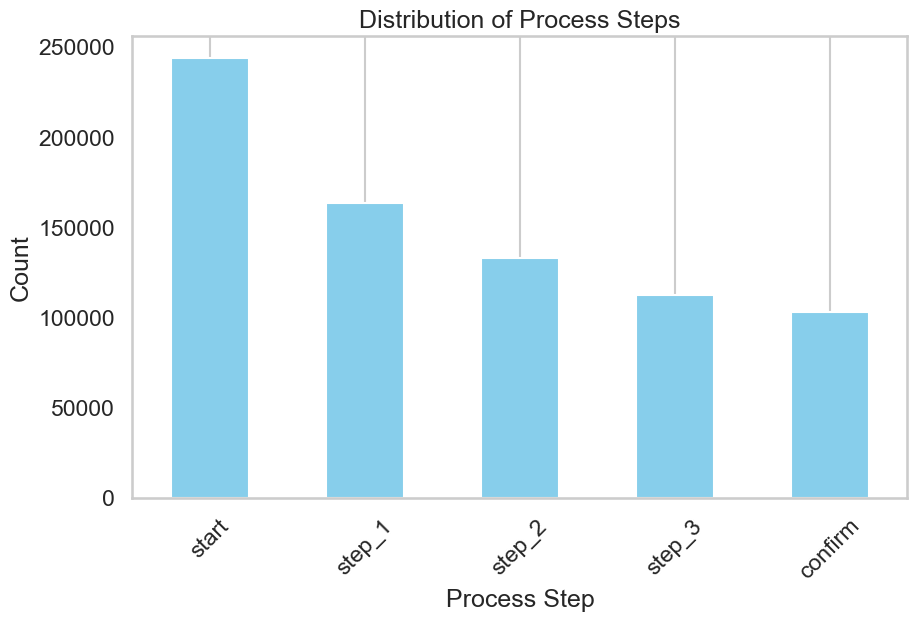

In [161]:
# Count the occurrences of each process step
process_step_counts = df['process_step'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
process_step_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

In [164]:
clientfreq = df.groupby("client_id")
clientfreq.size()

client_id
169         5
336         2
546         5
555         5
647         5
           ..
9999729    11
9999768    12
9999832     2
9999839     6
9999875     6
Length: 120157, dtype: int64

# **SPACE**

In [ ]:
new_df = pd.merge(df_final_demo, df, how="left", on = "client_id")
new_df

In [ ]:
new_df["date_time"] = pd.to_datetime(new_df["date_time"])
new_df


In [167]:
#Dalreen
new_df['date'] = new_df['date_time'].dt.date
new_df['time'] = new_df['date_time'].dt.time
new_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,date,time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,2017-04-02,11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,2017-04-02,11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,2017-03-29,11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,2017-04-02,11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,2017-03-29,11:01:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,2017-04-05,11:43:10
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,2017-04-05,11:41:32
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,2017-04-05 11:41:04,2017-04-05,11:41:04
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,2017-04-05,11:48:02


In [168]:
#Extract hours, minutes, and seconds:
new_df['hours'] = new_df['date_time'].dt.hour
new_df['minutes'] = new_df['date_time'].dt.minute
new_df['seconds'] = new_df['date_time'].dt.second

#Convert time to seconds since midnight:
new_df['time_in_seconds'] = new_df['hours'] * 3600 + new_df['minutes'] * 60 + new_df['seconds']

#Calculate quartiles:
quartiles = new_df['time_in_seconds'].quantile([0.25, 0.5, 0.75])

#Define a function to categorize times based on quartiles:
def categorize_time(seconds, q1, q2, q3):
    if seconds <= q1:
        return 'Q1'
    elif seconds <= q2:
        return 'Q2'
    elif seconds <= q3:
        return 'Q3'
    else:
        return 'Q4'

#Apply the categorization function:
new_df['time_quartile'] = new_df['time_in_seconds'].apply(categorize_time, args=(quartiles[0.25], quartiles[0.5], quartiles[0.75]))

# Display the resulting DataFrame
display(new_df)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,date,time,hours,minutes,seconds,time_in_seconds,time_quartile
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,2017-04-02,11:46:45,11,46,45,42405,Q2
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,2017-04-02,11:21:28,11,21,28,40888,Q2
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,2017-03-29,11:02:44,11,2,44,39764,Q1
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,2017-04-02,11:22:24,11,22,24,40944,Q2
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,2017-03-29,11:01:40,11,1,40,39700,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,2017-04-05,11:43:10,11,43,10,42190,Q2
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,2017-04-05,11:41:32,11,41,32,42092,Q2
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,2017-04-05 11:41:04,2017-04-05,11:41:04,11,41,4,42064,Q2
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,2017-04-05,11:48:02,11,48,2,42482,Q2


In [169]:
new_df.drop(columns='date_time', inplace=True)
new_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date,time,hours,minutes,seconds,time_in_seconds,time_quartile
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,11:46:45,11,46,45,42405,Q2
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02,11:21:28,11,21,28,40888,Q2
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29,11:02:44,11,2,44,39764,Q1
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02,11:22:24,11,22,24,40944,Q2
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29,11:01:40,11,1,40,39700,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05,11:43:10,11,43,10,42190,Q2
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05,11:41:32,11,41,32,42092,Q2
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,2017-04-05,11:41:04,11,41,4,42064,Q2
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05,11:48:02,11,48,2,42482,Q2


In [ ]:
clnt_age_freq_steps = new_df.groupby("clnt_age")["process_step"].count().sort_values(ascending = False)
clnt_age_freq_steps

In [ ]:
group_age= new_df.groupby("clnt_age")["logons_6_mnth"].mean()
group_age.sort_values(ascending=False, inplace=True)
group_age = pd.DataFrame(group_age)
group_age

In [ ]:
group_age.reset_index(inplace=True)
group_age.rename(columns={'index': 'clnt_age'}, inplace=True)
group_age

In [ ]:
plt.figure(figsize=(14, 8))
bars = plt.bar(group_age['clnt_age'], group_age['logons_6_mnth'], color='skyblue', edgecolor='k')
plt.xlabel('Client Age', fontsize=14)
plt.ylabel('Average Logons in 6 Months', fontsize=14)
plt.title('Average Logons in 6 Months by Client Age', fontsize=12)
plt.xticks(group_age['clnt_age'], rotation=45, ha='right', fontsize=3)
plt.yticks(fontsize=12)

# **SPACE**

In [ ]:
df_final_experiment_clients = pd.read_csv("data/df_final_experiment_clients.txt")
df_final_experiment_clients


In [ ]:
df_final_experiment_clients.Variation.unique()

In [ ]:
variation = df_final_experiment_clients.groupby("Variation")
variation.size()

In [ ]:
df_final_experiment_clients.isna().sum()

# KPI's